In [6]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('diabetes-dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


- Check for nulls/ Missing Values
- Check for duplicates
- Update data types

In [8]:
df.isnull().sum()
#no nulls

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [11]:
df.duplicated().any()
#given that data duplicates are reasonable, let's see if there is a high number of them

True

In [12]:
df.duplicated().sum()
#yes over 1256 out of 2000 entries, no need to adjust the data for duplication, 
# let's see data uniqueness

1256

In [13]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

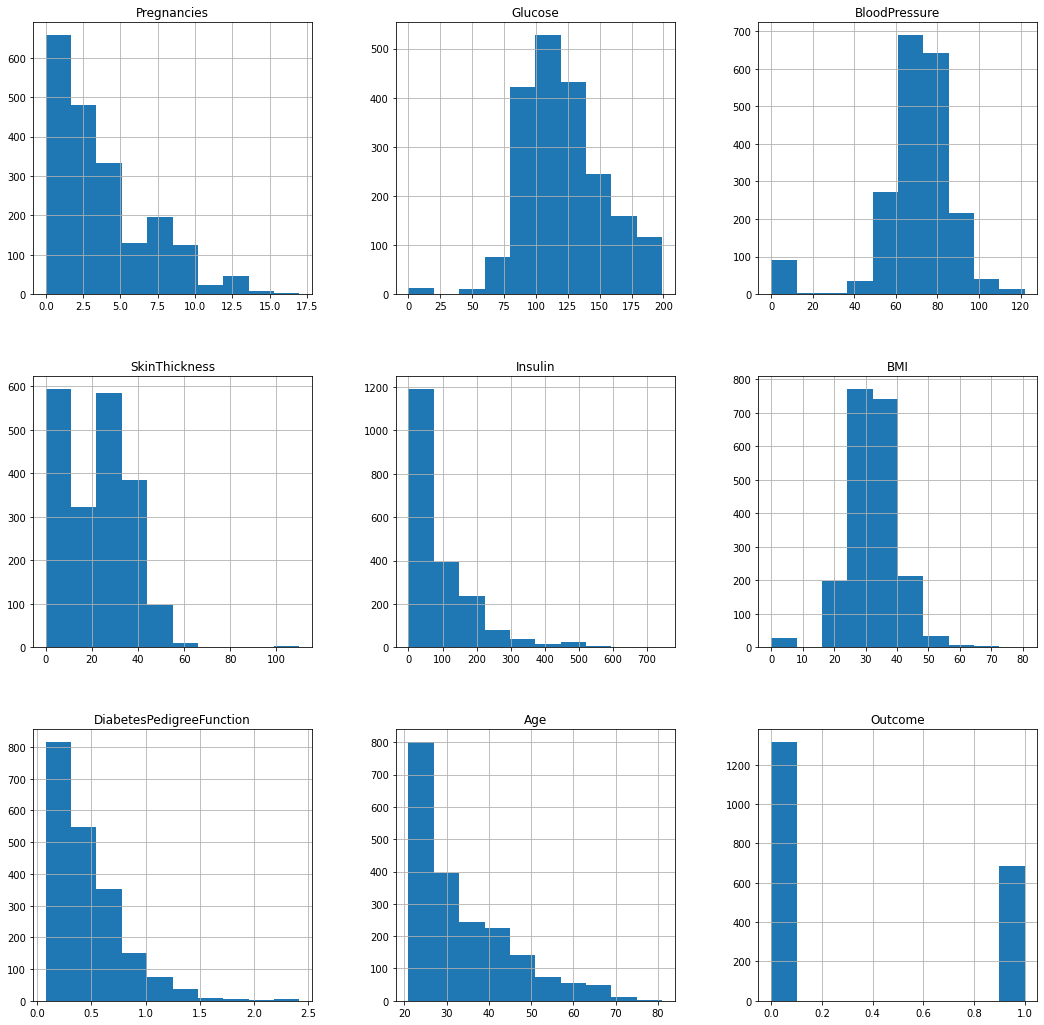

In [14]:
#visualize all variables
df.hist(figsize=(18, 18))

# What age group has the most number of outcomes (diagnosed with diabetes)?

<AxesSubplot:>

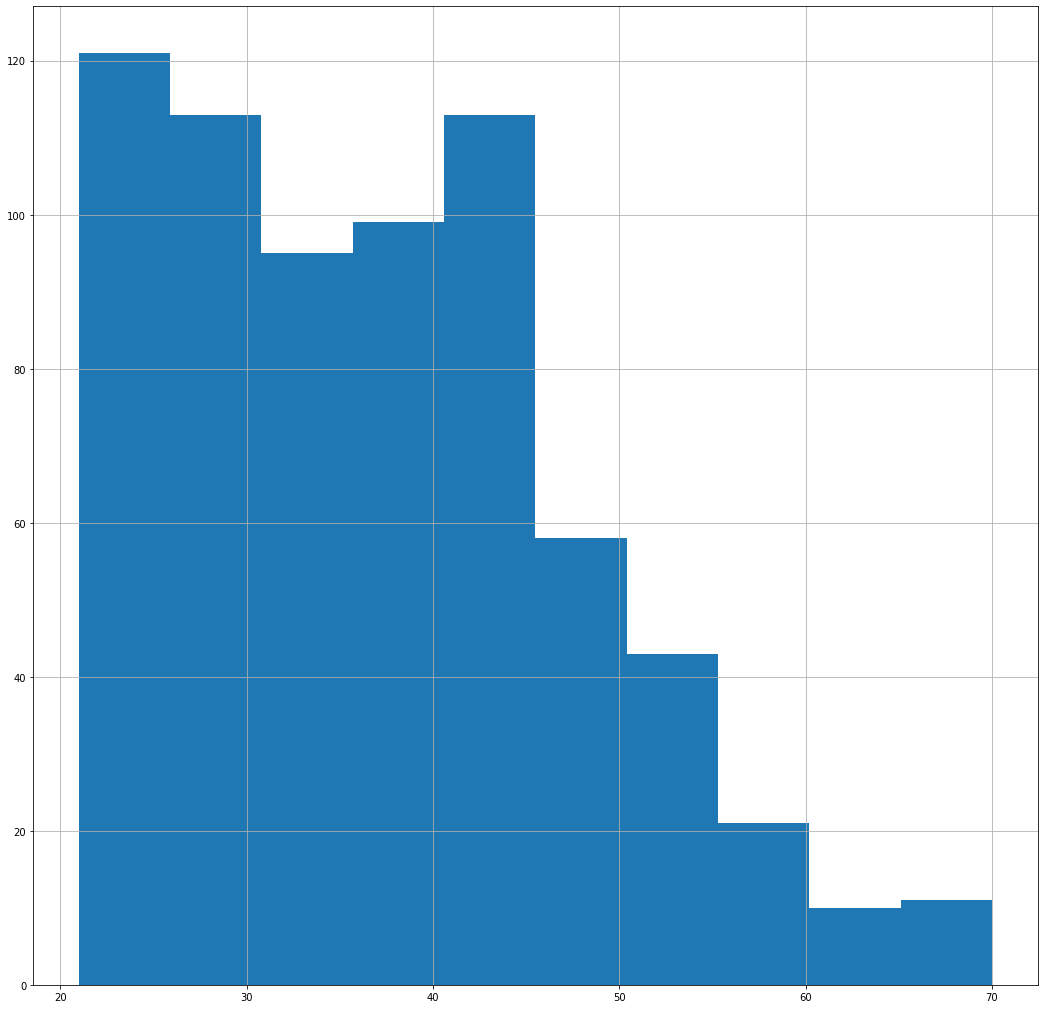

In [71]:
diagnosisAge = df['Age'][df['Outcome']==1]
diagnosisAge.hist(figsize=(18,18))

### Based on the histogram above we can conclude that the women aged in their early 20 had the most frequent diagnoses of diabetes.
### Let's look at a bar graph to conclude 


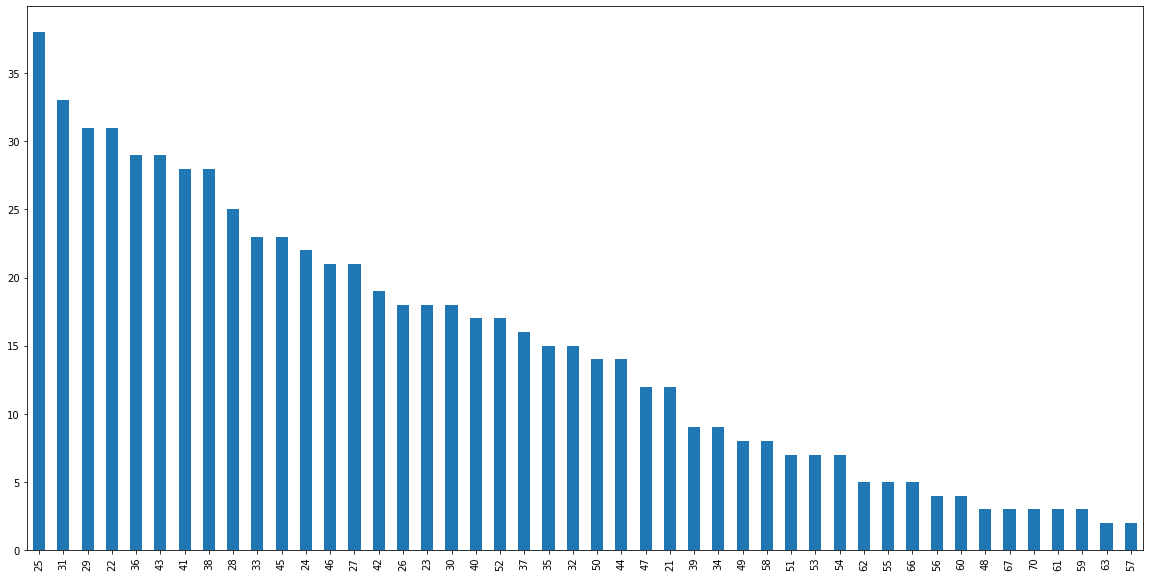

In [16]:
plt.figure(figsize=(20,10))
diagnosisAge.value_counts().plot.bar()
plt.show()

## 25 is the age group withe highest diagnoses

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Can You show the relationship between Glucose/Age and Glucose/Insulin?

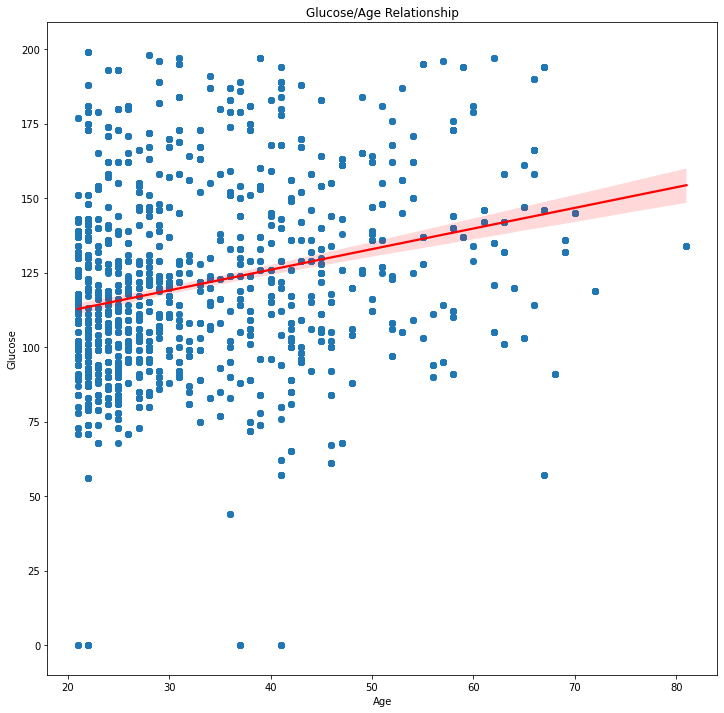

In [70]:
plt.figure(figsize=(12,12)) #Must be at the top to apply
plt.scatter(x=df['Age'] , y=df['Glucose'])
plt.title('Glucose/Age Relationship')
sb.regplot(x='Age', y='Glucose', data=df, line_kws={'color': 'red'})

plt.show()

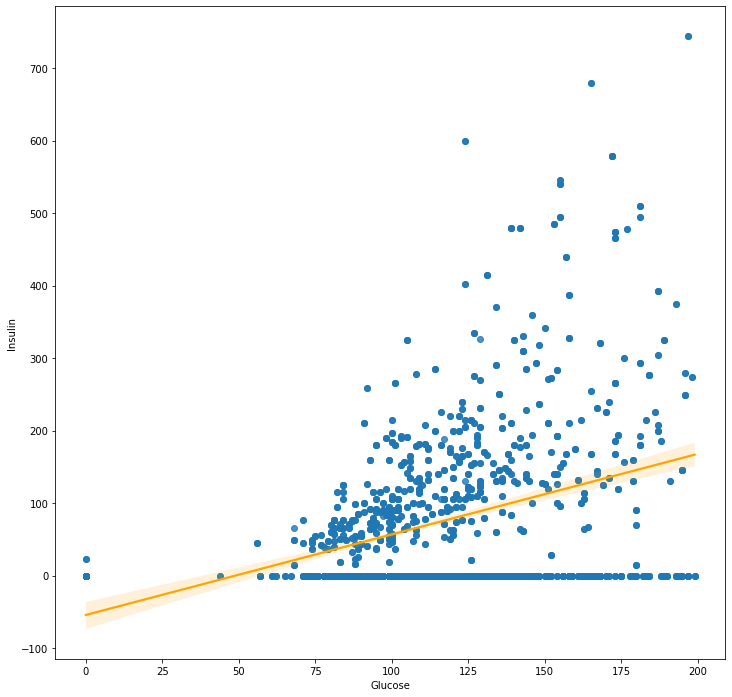

In [65]:
plt.figure(figsize=(12,12))
plt.xlabel('Glucose Level')
plt.ylabel('Insulin Level')
sb.regplot(x='Glucose', y='Insulin', data=df, line_kws={'color': 'orange'})
plt.show()

# What is the correlation of all fields?
# Can you determine which factor affects the probability of diabetes?

In [20]:
df.corr(method='pearson') #pearson, kendall, spearman


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


### Currently shows that Glucose levels have the highest correlation to diabetes diagnosis
### Let's look in a heatmap

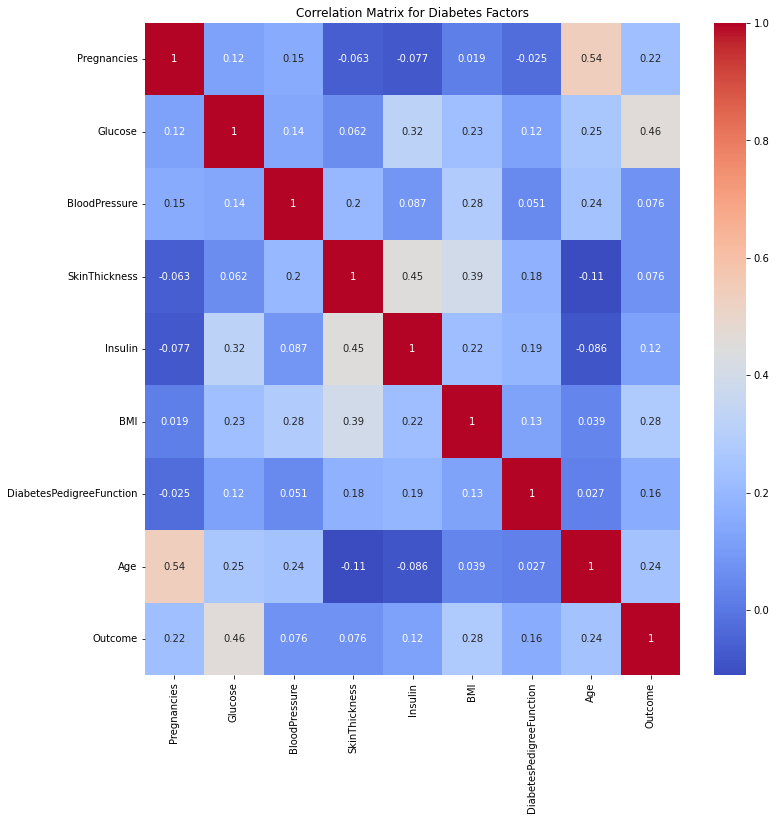

In [21]:
plt.figure(figsize=(12,12))
plt.title('Correlation Matrix for Diabetes Factors')
corr = df.corr(method='pearson')
sb.heatmap(corr, annot=True , cmap='coolwarm')
plt.show()

### This matrix shows there is not much postiive correlation between variables
### Glucose looks to show the highest correlation to Diabetes outcome
### Let's unstack and sort by Outcome to confirm

In [61]:
sort_corr = corr.unstack()
sort_corr['Outcome'].sort_values(ascending=False)
#Yes, as Glucose levels rise the probability of being diabetic rises

Outcome                     1.000000
Glucose                     0.458421
BMI                         0.276726
Age                         0.236509
Pregnancies                 0.224437
DiabetesPedigreeFunction    0.155459
Insulin                     0.120924
SkinThickness               0.076040
BloodPressure               0.075958
dtype: float64

# Limitations and Challenges
---
 I did not experience many limitations or challenges. 

 The data was succinct and numerical. This made it easy to perform calculations and correlation strategies to compare and contrast possible efficacies to a diabetes diagnosis.
 
 There was no missing data.

# Conclusion
---
Diabetes is a disease in which your blood glucose, or blood sugar, levels are too high.

Therefore, I wanted to detail how glucose and insulin relate to each other. Also which factors affect diabetes the most.

I found that Glucose/Insulin and Age/Glucose have a positive correlation.

I found that Glucose affects the probability of Diabetes the most. 